In [3]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import pymongo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
from bson import json_util
import seaborn as sns

#Read csv and convert in json

data_csv = pd.read_csv ("C:/Users/DEEP/Downloads/deep dap/Food_Inspections_New2_Converted.csv")
data_csv.to_json("C:/Users/DEEP/Downloads/deep dap/Food_Inspections_New2.json")
df=pd.read_json("C:/Users/DEEP/Downloads/deep dap/Food_Inspections_New2.json")

data = df.to_dict('records')

#connection to MongoDB
myclient=pymongo.MongoClient("mongodb://localhost:27017/")
mydb=myclient["food_inspection"]
mycol = mydb.Food_Inspection

x=mycol.insert_many(data)
print(x)

In [3]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results
0,2545939,MCDONALDS,MCDONALDS,2349545.0,Restaurant,Risk 2 (Medium),3241 W PETERSON AVE,CHICAGO,IL,60659.0,2021,Canvass Re-Inspection,Pass
1,2545928,TACONAZO EL ORIGINAL #1,TACONAZO EL ORIGINAL #1,2657927.0,Restaurant,Risk 1 (High),4124 W NORTH AVE,CHICAGO,IL,60639.0,2021,Canvass Re-Inspection,Pass
2,2545896,7-ELEVEN #24606,7-ELEVEN #24606,12892.0,Grocery Store,Risk 2 (Medium),2600 N LINCOLN AVE,CHICAGO,IL,60614.0,2021,Canvass,Out of Business
3,2545872,THE WESTIN MICHIGAN AVENUE,909 NORTH,2762706.0,Restaurant,Risk 1 (High),909 N MICHIGAN AVE,CHICAGO,IL,60611.0,2021,License,Pass
4,2545870,SUPER TAQUERIA EL TACONAZO EL TIO,SUPER TAQUERIA EL TACONAZO EL TIO,2458442.0,Restaurant,Risk 1 (High),3529 W FULLERTON AVE,CHICAGO,IL,60647.0,2021,Complaint,Pass


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6927 entries, 0 to 6926
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inspection ID    6927 non-null   int64  
 1   DBA Name         6927 non-null   object 
 2   AKA Name         6885 non-null   object 
 3   License #        6926 non-null   float64
 4   Facility Type    6927 non-null   object 
 5   Risk             6927 non-null   object 
 6   Address          6927 non-null   object 
 7   City             6920 non-null   object 
 8   State            6923 non-null   object 
 9   Zip              6926 non-null   float64
 10  Inspection Date  6927 non-null   int64  
 11  Inspection Type  6927 non-null   object 
 12  Results          6927 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 757.6+ KB


In [5]:
# Replacing the spaces of columns names with an underscore and
df.columns =[x.lower().replace(' ','_') for x in df.columns]

In [6]:
df.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license_#', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results'],
      dtype='object')

In [7]:
#Checking for the number of rows and columns in the dataset
df.shape

(6927, 13)

In [8]:
df.isnull().sum()

inspection_id       0
dba_name            0
aka_name           42
license_#           1
facility_type       0
risk                0
address             0
city                7
state               4
zip                 1
inspection_date     0
inspection_type     0
results             0
dtype: int64

In [11]:
df.shape

(6927, 13)

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.shape

(6876, 13)

In [14]:
df.isnull().sum()

inspection_id      0
dba_name           0
aka_name           0
license_#          0
facility_type      0
risk               0
address            0
city               0
state              0
zip                0
inspection_date    0
inspection_type    0
results            0
dtype: int64

In [15]:
df['results'].value_counts()

Pass                    2829
Out of Business         1281
No Entry                 859
Pass w/ Conditions       822
Fail                     735
Not Ready                348
Business Not Located       2
Name: results, dtype: int64

In [16]:
df['results'] = df['results'].map(lambda x: 1 if x == 'Pass' or x == 'Pass w/ Conditions' else 0)

In [17]:
df['results'].value_counts()

1    3651
0    3225
Name: results, dtype: int64

<AxesSubplot:xlabel='results', ylabel='count'>

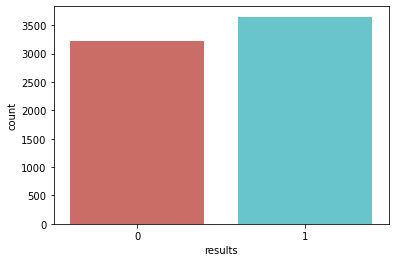

In [18]:
sns.countplot(x='results',data=df, palette='hls')

In [19]:
# Checking the values for different facilities
df['facility_type'].value_counts()

Restaurant                      4768
Grocery Store                    778
School                           396
Children's Services Facility     221
Bakery                            96
                                ... 
PALETERIA                          1
SUPPORTIVE LIVING                  1
EVENT SPACE                        1
Private School                     1
GROCERY STORE/GAS STATION          1
Name: facility_type, Length: 115, dtype: int64

In [20]:
df['facility_type'] = df['facility_type'].map(lambda x: 1 if x == 'Restaurant' else 0)

In [21]:
df['facility_type'].value_counts()

1    4768
0    2108
Name: facility_type, dtype: int64

<AxesSubplot:xlabel='facility_type', ylabel='count'>

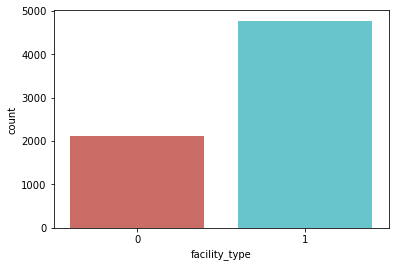

In [22]:
# Number of food inspections by facility type
sns.countplot(x='facility_type',data=df, palette='hls')

In [23]:
#Inspection types
df['inspection_type'].value_counts()

Canvass                                   3540
License                                   1165
Canvass Re-Inspection                      749
Complaint                                  483
License Re-Inspection                      302
Non-Inspection                             253
Complaint Re-Inspection                    214
Short Form Complaint                       137
Recent Inspection                           16
Suspected Food Poisoning                    10
License-Task Force                           2
Task Force Liquor 1475                       1
Suspected Food Poisoning Re-inspection       1
RECALL INSPECTION                            1
Consultation                                 1
Tag Removal                                  1
Name: inspection_type, dtype: int64

In [24]:
# Number of food inspection by inspection date
df['inspection_date'].value_counts()

2019    2887
2020    2028
2021    1876
2018      57
2010       7
1998       1
2011       1
2007       1
2003       1
1999       1
1995       1
1991       1
1987       1
2006       1
1988       1
1992       1
2009       1
2005       1
1997       1
1993       1
1989       1
2012       1
2004       1
2000       1
1996       1
1990       1
Name: inspection_date, dtype: int64

<AxesSubplot:xlabel='risk', ylabel='count'>

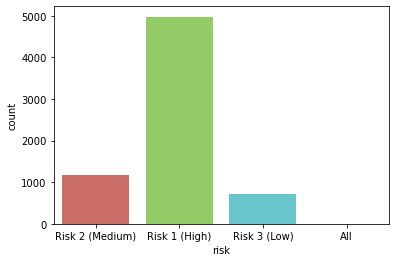

In [25]:
# Number of food inspections by risk
sns.countplot(x='risk',data = df, palette ='hls')

In [26]:
df['zip'].value_counts()

60647.0    275
60614.0    264
60622.0    253
60657.0    245
60618.0    241
          ... 
60438.0      1
60455.0      1
60126.0      1
60193.0      1
90067.0      1
Name: zip, Length: 64, dtype: int64

<AxesSubplot:xlabel='zip', ylabel='count'>

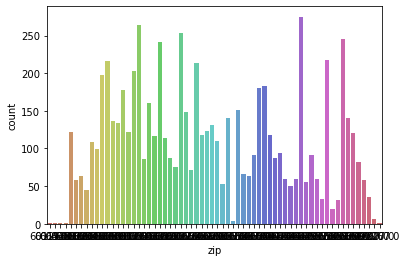

In [27]:
# Number of food inspections by zip
sns.countplot(x='zip',data = df, palette = 'hls')

<AxesSubplot:xlabel='inspection_type', ylabel='count'>

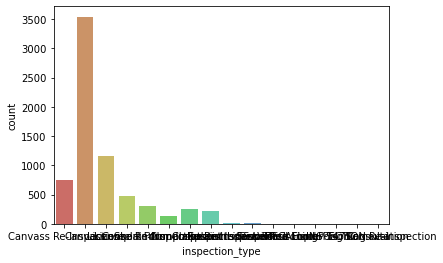

In [28]:
# Number of food inspections by inspection type
sns.countplot(x='inspection_type',data = df,palette = 'hls')

In [29]:
df['risk'].value_counts()

Risk 1 (High)      4979
Risk 2 (Medium)    1172
Risk 3 (Low)        720
All                   5
Name: risk, dtype: int64

In [30]:
df["risk"] = df["risk"].astype('category')
df.dtypes

inspection_id         int64
dba_name             object
aka_name             object
license_#           float64
facility_type         int64
risk               category
address              object
city                 object
state                object
zip                 float64
inspection_date       int64
inspection_type      object
results               int64
dtype: object

In [31]:
df["risk_cat"] = df["risk"].cat.codes
df.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,risk_cat
0,2545939,MCDONALDS,MCDONALDS,2349545.0,1,Risk 2 (Medium),3241 W PETERSON AVE,CHICAGO,IL,60659.0,2021,Canvass Re-Inspection,1,2
1,2545928,TACONAZO EL ORIGINAL #1,TACONAZO EL ORIGINAL #1,2657927.0,1,Risk 1 (High),4124 W NORTH AVE,CHICAGO,IL,60639.0,2021,Canvass Re-Inspection,1,1
2,2545896,7-ELEVEN #24606,7-ELEVEN #24606,12892.0,0,Risk 2 (Medium),2600 N LINCOLN AVE,CHICAGO,IL,60614.0,2021,Canvass,0,2
3,2545872,THE WESTIN MICHIGAN AVENUE,909 NORTH,2762706.0,1,Risk 1 (High),909 N MICHIGAN AVE,CHICAGO,IL,60611.0,2021,License,1,1
4,2545870,SUPER TAQUERIA EL TACONAZO EL TIO,SUPER TAQUERIA EL TACONAZO EL TIO,2458442.0,1,Risk 1 (High),3529 W FULLERTON AVE,CHICAGO,IL,60647.0,2021,Complaint,1,1


In [32]:
df['risk']= df['risk_cat']

In [33]:
df.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,risk_cat
0,2545939,MCDONALDS,MCDONALDS,2349545.0,1,2,3241 W PETERSON AVE,CHICAGO,IL,60659.0,2021,Canvass Re-Inspection,1,2
1,2545928,TACONAZO EL ORIGINAL #1,TACONAZO EL ORIGINAL #1,2657927.0,1,1,4124 W NORTH AVE,CHICAGO,IL,60639.0,2021,Canvass Re-Inspection,1,1
2,2545896,7-ELEVEN #24606,7-ELEVEN #24606,12892.0,0,2,2600 N LINCOLN AVE,CHICAGO,IL,60614.0,2021,Canvass,0,2
3,2545872,THE WESTIN MICHIGAN AVENUE,909 NORTH,2762706.0,1,1,909 N MICHIGAN AVE,CHICAGO,IL,60611.0,2021,License,1,1
4,2545870,SUPER TAQUERIA EL TACONAZO EL TIO,SUPER TAQUERIA EL TACONAZO EL TIO,2458442.0,1,1,3529 W FULLERTON AVE,CHICAGO,IL,60647.0,2021,Complaint,1,1


<AxesSubplot:xlabel='risk', ylabel='count'>

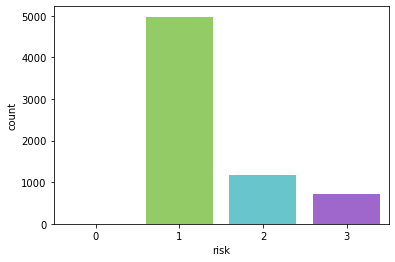

In [34]:
# Number of food inspections by risk
sns.countplot(x='risk',data = df, palette ='hls')

<AxesSubplot:>

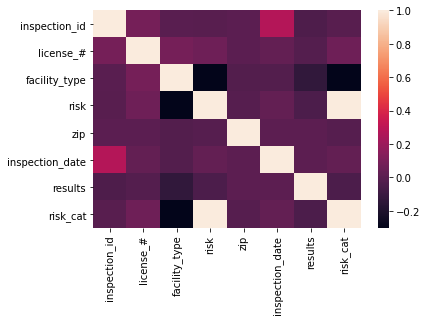

In [35]:
sns.heatmap(df.corr())

In [36]:
df.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,risk_cat
0,2545939,MCDONALDS,MCDONALDS,2349545.0,1,2,3241 W PETERSON AVE,CHICAGO,IL,60659.0,2021,Canvass Re-Inspection,1,2
1,2545928,TACONAZO EL ORIGINAL #1,TACONAZO EL ORIGINAL #1,2657927.0,1,1,4124 W NORTH AVE,CHICAGO,IL,60639.0,2021,Canvass Re-Inspection,1,1
2,2545896,7-ELEVEN #24606,7-ELEVEN #24606,12892.0,0,2,2600 N LINCOLN AVE,CHICAGO,IL,60614.0,2021,Canvass,0,2
3,2545872,THE WESTIN MICHIGAN AVENUE,909 NORTH,2762706.0,1,1,909 N MICHIGAN AVE,CHICAGO,IL,60611.0,2021,License,1,1
4,2545870,SUPER TAQUERIA EL TACONAZO EL TIO,SUPER TAQUERIA EL TACONAZO EL TIO,2458442.0,1,1,3529 W FULLERTON AVE,CHICAGO,IL,60647.0,2021,Complaint,1,1
